In [ ]:
# 按照“学习资料”中实验要求，完成线性回归实验作业
# 数据理解	理解数据集背景以及数据含义。
# 数据读入	使用pandas 读入数据并输出读入的数据
# 定义特征值，目标值	使用'crim', 'rm', 'lstat'作为特征值，'medv'为目标值，输出特征值的描述性统计
# 区分训练集和测试集	split_num = int(len(features)*0.7)
# 线性回归	利用sklearn的LinearRegression()函数进行线性回归，输出模型的回归方程系数及方程的截距
# 预测	对数据集进行预测，输出预测值
# 获取平均绝对误差	求取预测值和真实值的mae
# 获取均分误差	求取预测值和真实值的mse
# 好家伙，scikit-learn自带呀

In [1]:
!pip install scikit-learn
!pip install pandas

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [1]:
from sklearn.datasets import load_boston  # 从skelan的数据集中导入数据

In [2]:
dataset = load_boston()  # 将数据集合中的数据赋值给dataset
x_data = dataset.data  # 导入所有特征变量，赋值给x
y_data = dataset.target  # 导入目标值（房价），赋值给Y
name_data = [v.lower() for v in dataset.feature_names]  # 导入特征名
print(x_data.shape, y_data.shape)

(506, 13) (506,)


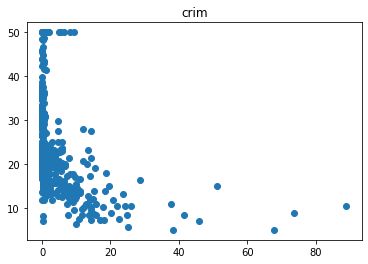

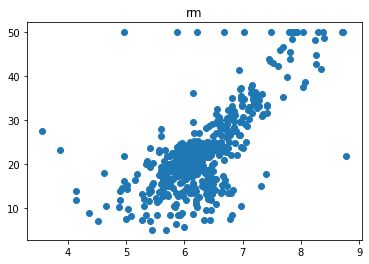

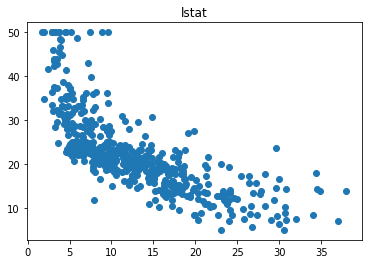

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# 检查数据相关性（归一化前）
target = ['crim', 'rm', 'lstat']
tar_ids = [name_data.index(v) for v in target]
for i in tar_ids:
    feature = x_data[:, i]
    label = y_data[:]
    plt.title(name_data[i])
    plt.scatter(feature, label)
    plt.show() 

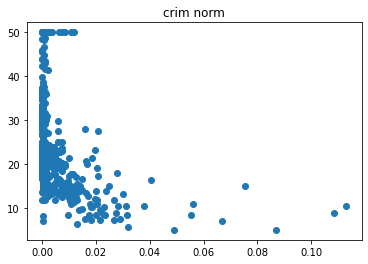

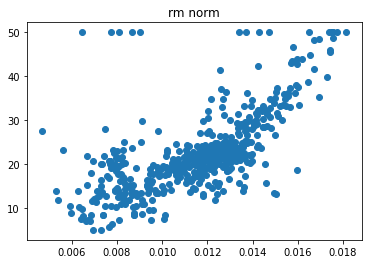

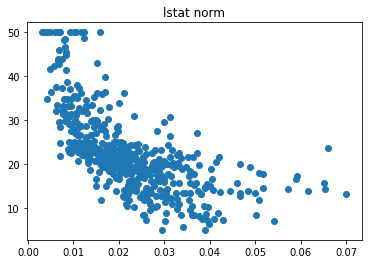

In [5]:
from sklearn.preprocessing import normalize

norm_x_data = normalize(x_data)
target = ['crim', 'rm', 'lstat']
tar_ids = [name_data.index(v) for v in target]
for i in tar_ids:
    feature = norm_x_data[:, i]
    label = y_data[:]
    plt.title(name_data[i]+' norm')
    plt.scatter(feature, label)
    plt.show() 

In [6]:
from sklearn.model_selection import train_test_split  # 导入训练模块库函数

x_data = normalize(x_data)
# 随机擦痒30%的数据构建测试样本，剩余作为训练样本（主播是没开麦）
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0,test_size=0.3)

In [7]:
from sklearn.linear_model import LinearRegression  # 导入线性训练模型
lr = LinearRegression()
 
#使用训练数据进行参数估计
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#回归预测
lr_y_predict=lr.predict(X_test)  # 根据模型lr预测出的y的值
mae_test = mean_absolute_error(y_test, lr_y_predict)
mse_test = mean_squared_error(y_test, lr_y_predict)
print('-[INFO] mae test:', mae_test)
print('-[INFO] mse test:', mse_test)

#回归预测
lr_y_predict=lr.predict(X_train)  # 根据模型lr预测出的y的值
mae_train = mean_absolute_error(y_train, lr_y_predict)
mse_train = mean_squared_error(y_train, lr_y_predict)
print('-[INFO] mae train:', mae_train)
print('-[INFO] mse train:', mse_train)

-[INFO] mae test: 3.488102073205083
-[INFO] mse test: 27.606091808626843
-[INFO] mae train: 2.9463183614825192
-[INFO] mse train: 19.4417759639193


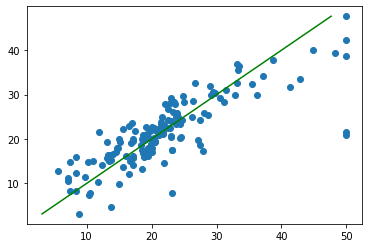

In [11]:
import matplotlib.pyplot as plt
import numpy as np
lr_y_predict=lr.predict(X_test)  # 根据模型lr预测出的y的值
xmin = min(np.min(y_test), np.min(lr_y_predict))
xmax = min(np.max(y_test), np.max(lr_y_predict))

plt.scatter(y_test, lr_y_predict)
plt.plot([xmin, xmax], [xmin, xmax], c='g')
plt.show()